In [1]:
import os
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

import torch
import matplotlib.pyplot as plt
from pdf2image import convert_from_path

from chandra.model import InferenceManager, BatchInputItem

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
file_path = "../artifacts/11/OReilly.Programming.Computer.Vision.with.Python.Jun.2012.RETAIL.eBook-ELOHiM.pdf-0ea8c330-143a-48ee-a34b-5ab60ab26c19.pdf"
pages = convert_from_path(file_path, dpi=200)

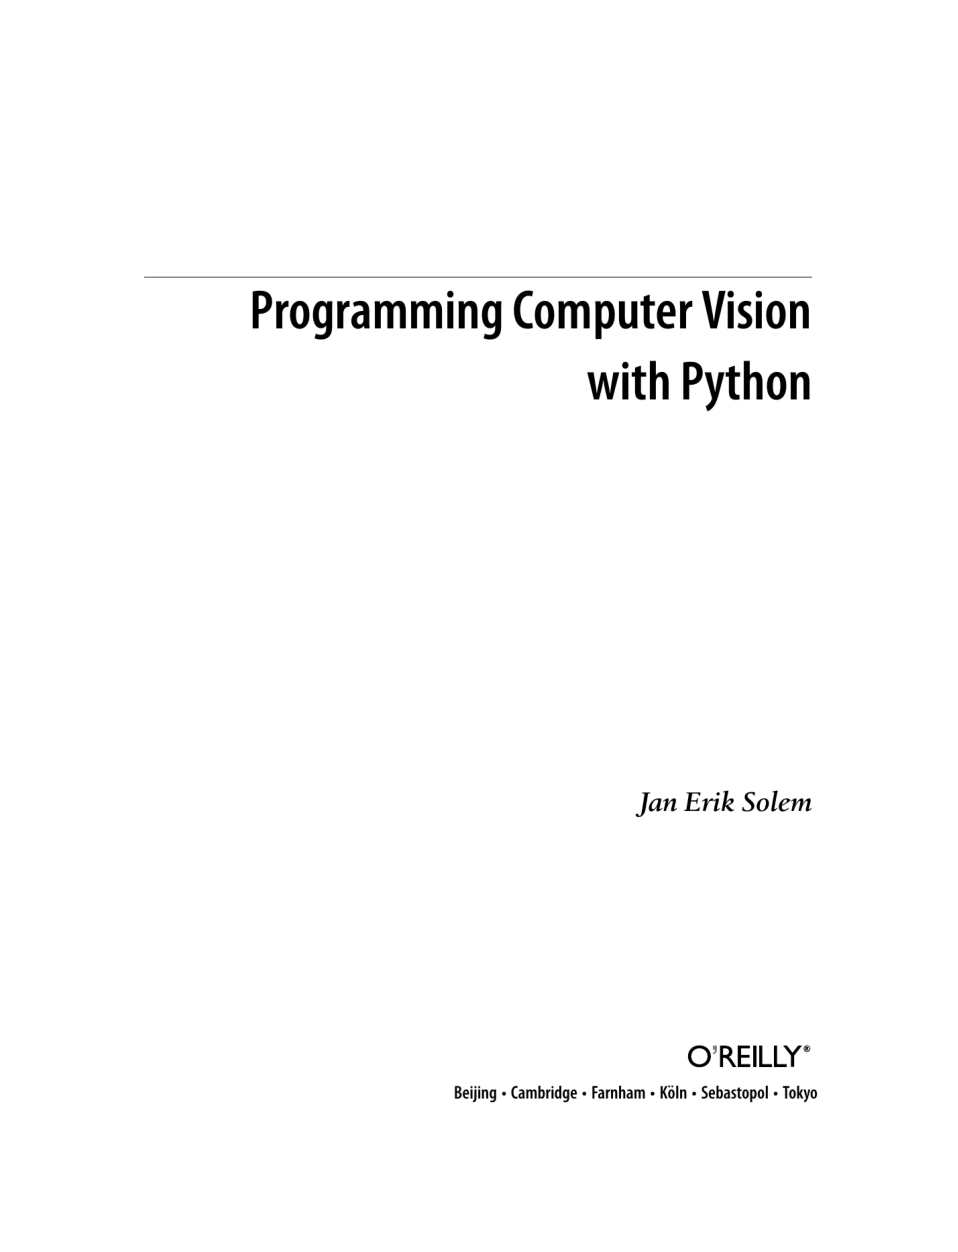

In [4]:
simple_text_image = pages[2]
plt.figure(figsize=(16, 16))
plt.imshow(simple_text_image)       # hiển thị ảnh
plt.axis('off')                     # tắt trục tọa độ
plt.show()

In [5]:
manager = InferenceManager(method="hf")
batch = [BatchInputItem(
        image=simple_text_image,
        prompt_type="ocr_layout",
    )
]
outputs = manager.generate(batch, max_output_tokens=128)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Some parameters are on the meta device because they were offloaded to the disk and cpu.


OutOfMemoryError: CUDA out of memory. Tried to allocate 1.11 GiB. GPU 0 has a total capacity of 4.00 GiB of which 0 bytes is free. Of the allocated memory 2.66 GiB is allocated by PyTorch, and 787.46 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
def test_inference_image(simple_text_image):
    manager = InferenceManager(method="hf")
    batch = [
        BatchInputItem(
            image=simple_text_image,
            prompt_type="ocr_layout",
        )
    ]
    outputs = manager.generate(batch, max_output_tokens=128)
    assert len(outputs) == 1
    output = outputs[0]
    assert "Hello, World!" in output.markdown

    chunks = output.chunks
    assert len(chunks) == 1